# Support Vector Machines - Supervised learning - Exercise

## Overview  
In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. 

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

The Scikit-learn machine learning library for Python will be used in this exercise.

In [1]:
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import matplotlib
from sklearn import svm
import scipy.io as sio
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

<function matplotlib.pyplot.show(close=None, block=None)>

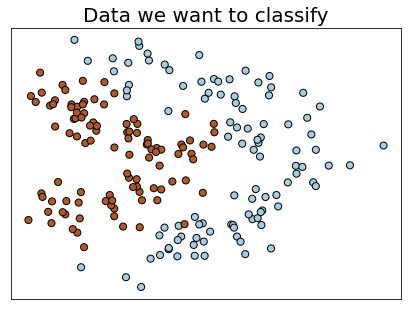

In [2]:
data = sio.loadmat('ex2.data.mat')

x = data['X']
y = data['Y']

plt.figure(0,figsize=(7,5))
plt.scatter(data['X'][:, 0], data['X'][:, 1],s=50, c=y,facecolors='none',zorder=10, cmap=plt.cm.Paired,edgecolors='k')
plt.title("Data we want to classify",fontsize=20)
plt.xticks(())
plt.yticks(())
plt.show

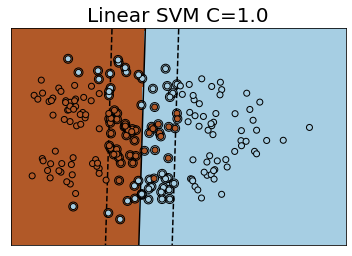

Accuracy = 0.8265 with C=1.0


In [3]:
X = data['X']
Y = data['Y']
Y=np.ravel(Y)
Valeur_C=1.0

clf = svm.SVC(kernel='linear', C=Valeur_C)
clf.fit(X, Y)


w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(2, 15)
yy = a * xx - (clf.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
            edgecolors='k')

plt.axis('tight')
x_min = 2
x_max = 14
y_min = -14
y_max = 14

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired,shading='auto')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.title("Linear SVM C=1.0",fontsize=20)
plt.show()

X_test=data['XTEST']
Y_test=data['YTEST']

acc=clf.score(X_test,Y_test)
print(f"Accuracy = {acc} with C={Valeur_C}")


## We will now be testing different values of the parameter C and see which one gives us the best classification accuracy

What's the purpose of the C paramater?

A large value of C basically tells our model that we do not have that much faith in our data’s distribution, and will only consider points close to line of separation.
A small value of C includes more/all the observations, allowing the margins to be calculated using all the data in the area.

In [4]:
X = data['X']
Y = data['Y']

kf = KFold(n_splits=5)
kf.get_n_splits(X)

c_range = np.array([0.01, 0.1, 1, 10, 100, 1000])

Accuracy=np.array([])

for penalty in c_range:
    
    accmoy=np.array([])

    for train_index, test_index in kf.split(X):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        clf = svm.SVC(kernel='linear', C=penalty)
        y_train=np.ravel(y_train)
        clf.fit(x_train, y_train)

        acc=clf.score(x_test,y_test)
        accmoy=np.append(accmoy,acc)

    print(f"Mean accuracy for C={penalty} est:{np.mean(accmoy)}")
    Accuracy=np.append(Accuracy,np.mean(accmoy))

Mean accuracy for C=0.01 est:0.74
Mean accuracy for C=0.1 est:0.75
Mean accuracy for C=1.0 est:0.745
Mean accuracy for C=10.0 est:0.745
Mean accuracy for C=100.0 est:0.745
Mean accuracy for C=1000.0 est:0.745


## With a linear SVM we can see that the value of the parameter C=0.01 gives the best classification accuracy

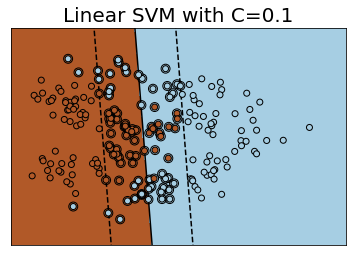

Accuracy = 0.8315 with C=0.1
We have 89 support vectors


In [5]:
Valeur_C=0.1

X = data['X']
Y = data['Y']
Y=np.ravel(Y)

clf = svm.SVC(kernel='linear', C=Valeur_C)
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(2, 15)
yy = a * xx - (clf.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,edgecolors='k')
plt.axis('tight')

x_min = 2
x_max = 14
y_min = -14
y_max = 14

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

#Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired,shading='auto')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.title("Linear SVM with C=0.1",fontsize=20)
plt.show()

v_supp=len(clf.support_vectors_[:, 0])

X_test=data['XTEST']
Y_test=data['YTEST']

acc=clf.score(X_test,Y_test)
print(f"Accuracy = {acc} with C={Valeur_C}")
print(f"We have {v_supp} support vectors")


## We can see that our data is not linearly separable.

## A SVM with a gaussian kernel will be now used.

In [6]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)

c_range = np.array([0.01, 0.1, 1, 10, 100, 1000])
gamma_range = np.array([0.01, 0.1, 1, 10, 100, 1000])

Accuracy=np.array([])

for g in gamma_range:
    for penalty in c_range:
        accmoy=np.array([])
        for train_index, test_index in kf.split(X):
            x_train, x_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]

            clf = svm.SVC(kernel="rbf", gamma=g, C=penalty)
            clf.fit(x_train, y_train)

            acc=clf.score(x_test,y_test)
            accmoy=np.append(accmoy,acc)

        Accuracy=np.append(Accuracy,np.mean(accmoy))


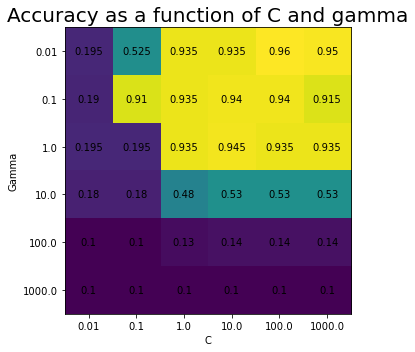

In [7]:
Accuracy=np.around(Accuracy,3)
Accuracy2d = np.reshape(Accuracy,(6, 6))

fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(Accuracy2d)

ax.set_xticks(np.arange(len(c_range)))
ax.set_yticks(np.arange(len(gamma_range)))
ax.set_xticklabels(c_range)
ax.set_yticklabels(gamma_range)
ax.set_xlabel("C")
ax.set_ylabel("Gamma")

plt.setp(ax.get_xticklabels(), rotation=0, ha="center",rotation_mode="anchor")

for i in range(len(gamma_range)):
    for j in range(len(c_range)):
        text = ax.text(j, i, Accuracy2d[i, j], ha="center", va="center", color="k")

ax.set_title("Accuracy as a function of C and gamma",fontsize=20)
fig.tight_layout()
plt.show()

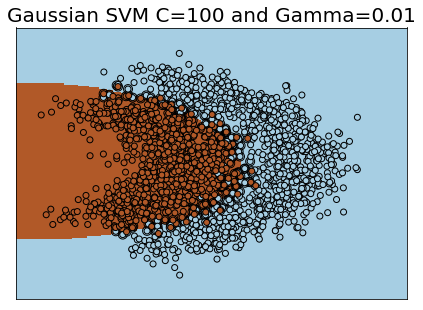

Accuracy = 0.969 and we have 167 support vectors


In [10]:
clf = svm.SVC(kernel="rbf", gamma=0.01, C=100)
Y_test=np.ravel(Y_test)
clf.fit(X_test,Y_test)

plt.figure(0, figsize=(7, 5))
plt.clf()
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, zorder=10, cmap=plt.cm.Paired, edgecolors='k')

plt.axis('tight')
x_min = 0
x_max = 14
y_min = -14
y_max = 14

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired,shading='auto')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.title("Gaussian SVM C=100 and Gamma=0.01",fontsize=20)
plt.show()

vecteur_supp=len(clf.support_vectors_[:, 0])
acc=clf.score(X_test,Y_test)

print(f"Accuracy = {acc} and we have {vecteur_supp} support vectors")

In [9]:
pred=clf.predict(X_test)
f_pred=np.equal(pred,Y_test.T)
count=np.size(Y_test)-np.count_nonzero(f_pred)
error=round((count/2000)*100,2)

print(f"The classification error rate is now: {error}%")

The classification error rate is now: 3.1%
